In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import Xception
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np



In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_val = x_train[:40000], x_train[40000:]
y_train, y_val = y_train[:40000], y_train[40000:]

x_train = tf.keras.applications.xception.preprocess_input(x_train)
x_val = tf.keras.applications.xception.preprocess_input(x_val)
x_test = tf.keras.applications.xception.preprocess_input(x_test)

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [14]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

base_model.trainable = False

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Resizing(75, 75)(inputs)
x = base_model(x, training=False)  
x = layers.GlobalAveragePooling2D()(x)  
x = layers.Dropout(0.2)(x)  
outputs = layers.Dense(10, activation='softmax')(x)  
model = keras.Model(inputs, outputs)

In [15]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [16]:
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing_1 (Resizing)                │ (None, 75, 75, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 3, 3, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,881,970 (79.66 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [17]:
epochs = 10
batch_size = 32

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6533 - loss: 1.0754 - val_accuracy: 0.7502 - val_loss: 0.7669
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 75s 29ms/step - accuracy: 0.7531 - loss: 0.7500 - val_accuracy: 0.7591 - val_loss: 0.7386
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.7671 - loss: 0.7033 - val_accuracy: 0.7621 - val_loss: 0.7334
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7702 - loss: 0.6944 - val_accuracy: 0.7564 - val_loss: 0.7427
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.7740 - loss: 0.6773 - val_accuracy: 0.7637 - val_loss: 0.7300
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.7773 - loss: 0.6617 - val_accuracy: 0.7595 - val_loss: 0.7451
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.7828 - loss: 0.6576 - val_accuracy: 0.7627 - val_loss: 0.7307
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 26ms/step - accuracy: 0.7783 -

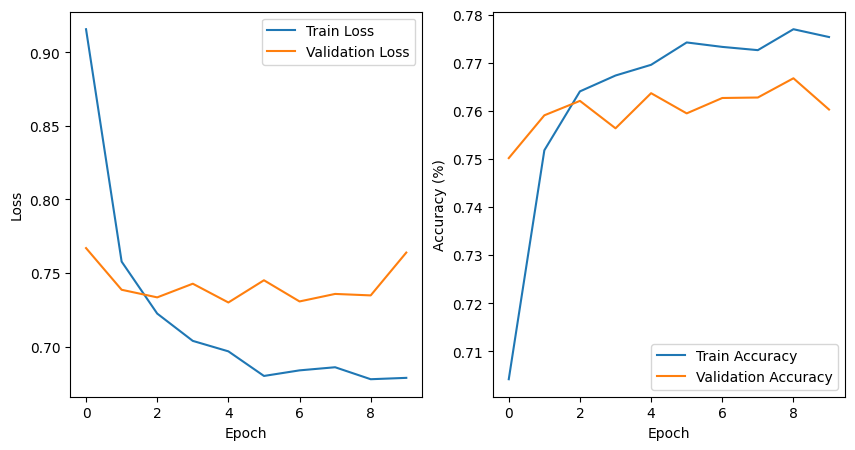

In [18]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

In [19]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Loss: 0.7911
Test Accuracy: 75.32%


In [20]:
trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
non_trainable_params = sum([tf.size(w).numpy() for w in model.non_trainable_weights])

print(f'Number of trainable parameters: {trainable_params}')
print(f'Number of non-trainable parameters: {non_trainable_params}')
print(f'Total number of parameters: {trainable_params + non_trainable_params}')

Number of trainable parameters: 20490
Number of non-trainable parameters: 20861480
Total number of parameters: 20881970
